# Objective
This notebook demonstrates the more responsive implementation of show_stack()

# Approach
### Faster scrolling
The current version in master creates a new imshow() plot each time the slider is adjusted. Recreating the entire plot is very slow, so instead we use the imshow().set_data() to update just the image data. We should be able to make show_stack(). If we need to go faster, we may need to look into a different plotting library (e.g., pyqtgraph).

Additionally, note that I use the 'notebook' (as opposed to 'inline'), which both allows the draw to work and gives an image tooltip. The tooltip is super userful because it reads out the coordinates and intensity of the pixel under the cursor!

### Proposal for show_spots
1) Before calling interact object, draw all of the spots on the image (as if they were z projected). Set all spots to set_visible = False (i.e., make them invisible)

2) When the viewer "scrolls" between slices, toggle the visible property for spots that are members of that frame. This could potentially be done with a masking operation (or map?) using precomputed masks for speed.


# Questions
* Will the proposed show_spots method work? Will it generalize to other slicing (i.e., not along z)?
* Does it matter what backend (e.g., QtAgg or TkAgg) the user has?
* Is the figure size too big? 

In [1]:
%matplotlib notebook

from starfish.io import Stack
from starfish.constants import Indices
from starfish.constants import Indices

In [2]:
# Load the MERFISH data set.
MERFISH_json = 'https://dmf0bdeheu4zf.cloudfront.net/MERFISH/fov_001/experiment.json'

s1 = Stack()
s1.read(MERFISH_json)

<IPython.core.display.Javascript object>


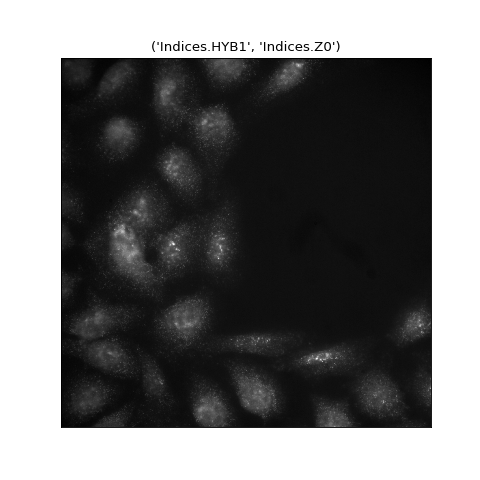

interactive(children=(IntSlider(value=3, description='plane_index', max=7), Output()), _dom_classes=('widget-interact',))

In [10]:
# Show the stack
s1.image.show_stack(indices={Indices.CH: 0}, figure_size=(6, 6));